In [29]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 28})
plt.rcParams['text.usetex'] = True
plt.rc("text", usetex=True)
plt.rc("font", family='serif')


In [5]:
from sklearn.svm import SVC

# filename = '/Users/roberto/data/RO-logging/2019-02-06-11-52-52/tmp_combined_data.csv';
# filename = '/Users/roberto/data/RO-logging/datasets/ro-eigenvecs/maxEVecs-ro-dataset.csv';
dateAndTime = "2019-03-18-15-00-42-velCorrectorOn/";
filename = "/Users/roberto/data/odometry-comparisons/rugged_ro/"\
"2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/standard-ro/"+dateAndTime+'tmp_combined_data.csv';

print('Reading from: ' + filename)
df_combined_data = pd.read_csv(filename, names=range(2400))
df_maxEVecs = df_combined_data.iloc[:,1:] #pd.read_csv(filename, names=range(2400))

df_labels = df_combined_data.iloc[:,0:1]
labels = np.copy(df_labels.values)
labels = labels.T

[m,n] = shape(df_maxEVecs)

print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))
print("Shape of data is:\n",shape(df_combined_data))

Reading from: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/2019-03-18-15-00-42-velCorrectorOn/tmp_combined_data.csv
Shape of max eigenvecs is:
 (5955, 2399)
Shape of labels is:
 (5955, 1)
Shape of data is:
 (5955, 2400)


1265


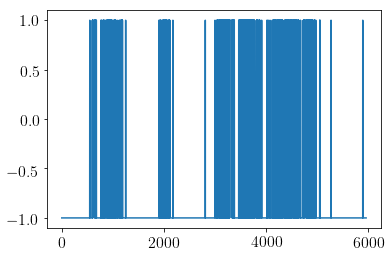

In [6]:
df_labels.head()
plt.plot(df_labels)
print(np.count_nonzero(df_labels+1))

In [7]:
# where_are_NaNs = isnan(df_maxEVecs)
# df_maxEVecs[where_are_NaNs] = 0.0
df_maxEVecs.head()

,1,2,3,4,5,6,7,8,9,10,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.026703,0.026701,0.026697,0.026691,0.026687,0.026681,0.026679,0.026677,0.026674,0.026669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026910,0.026902,0.026901,0.026898,0.026897,0.026897,0.026896,0.026896,0.026894,0.026894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.026918,0.026916,0.026915,0.026907,0.026903,0.026897,0.026897,0.026892,0.026891,0.026878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026909,0.026903,0.026895,0.026891,0.026891,0.026887,0.026882,0.026847,0.026847,0.026846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.026921,0.026920,0.026919,0.026918,0.026880,0.026876,0.026875,0.026872,0.026871,0.026855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Handcrafted features for all data (train and test data)
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
area_under_curve = []

for i in range(m): 
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
temp_dict = {'max_vals':max_vals,
             'num_landmarks':num_landmarks,
             'area_under_curve':area_under_curve}

df_features = pd.DataFrame(data = temp_dict)
print(df_features.shape)
df_features.head()
    
# minus1_max_vals = [max_vals[0]]
# minus1_max_vals = np.append(minus1_max_vals,max_vals[0:m-1])
# minus1_num_landmarks = [num_landmarks[0]]
# minus1_num_landmarks = np.append(minus1_num_landmarks,num_landmarks[0:m-1])
# minus1_area_under_curve = [area_under_curve[0]]
# minus1_area_under_curve = np.append(minus1_area_under_curve,area_under_curve[0:m-1])

(5955, 3)


,max_vals,num_landmarks,area_under_curve
0,0.026703,1614,39.880415
1,0.026910,1604,39.792908
2,0.026918,1604,39.727950
3,0.026909,1614,39.871966
4,0.026921,1612,39.847845


In [9]:
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
area_under_curve = []

for i in range(m): 
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
temp_dict = {'maxVals':max_vals,
             'numLandmarks':num_landmarks,
             'areaUnderCurve':area_under_curve}

df_features = pd.DataFrame(data = temp_dict)
print(df_features.shape)
df_features.head()

num_scans_used = 18
for i in range(1,num_scans_used):
#     print('i = ',i)
    df_features[i*3] = df_features['maxVals'].iloc[:-i]
    df_features[i*3] = df_features[i*3].shift(i)
    df_features.loc[0:i,i*3] = df_features['maxVals'].iloc[0]

    df_features[i*3+1] = df_features['numLandmarks'].iloc[:-i]
    df_features[i*3+1] = df_features[i*3+1].shift(i)
    df_features.loc[0:i,i*3+1] = df_features['numLandmarks'].iloc[0]

    df_features[i*3+2] = df_features['areaUnderCurve'].iloc[:-i]
    df_features[i*3+2] = df_features[i*3+2].shift(i)
    df_features.loc[0:i,i*3+2] = df_features['areaUnderCurve'].iloc[0]

print(df_features.shape)
df_features.head()


(5955, 3)
(5955, 54)


,maxVals,numLandmarks,areaUnderCurve,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.026703,1614,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
1,0.026910,1604,39.792908,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
2,0.026918,1604,39.727950,0.026910,1604.0,39.792908,0.026703,1614.0,39.880415,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
3,0.026909,1614,39.871966,0.026918,1604.0,39.727950,0.026910,1604.0,39.792908,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
4,0.026921,1612,39.847845,0.026909,1614.0,39.871966,0.026918,1604.0,39.727950,0.026910,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

maxEVecs = np.array(df_maxEVecs.values)
y_labels = ravel(labels)


print('Good RO: ',np.count_nonzero(y_labels==-1))
print('Bad RO:',np.count_nonzero(y_labels==1),'\n')

X_total = np.copy(df_features.values)
y_total = np.copy(y_labels)

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=0)

for train_index, test_index in sss.split(X_total, y_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    eig_train, eig_test = maxEVecs[train_index], maxEVecs[test_index]

print('Good vs Bad RO in training: ',np.count_nonzero(y_train==-1),'good,',np.count_nonzero(y_train==1),'bad')
print('Good vs Bad RO in testing:',np.count_nonzero(y_test==-1),'good,',np.count_nonzero(y_test==1),'bad \n')

print('Good/Bad ratio in training: ',np.count_nonzero(y_train==-1)/np.count_nonzero(y_train==1))
print('Good/Bad ratio in testing:',np.count_nonzero(y_test==-1)/np.count_nonzero(y_test==1),'\n')

# print('Bad RO % in training: ',np.count_nonzero(y_train==1)/np.count_nonzero(labels==1))
# print('Bad RO % in testing:',np.count_nonzero(y_test==1)/np.count_nonzero(labels==1),'\n')

print('Bad RO % in training: ',np.count_nonzero(y_train==1)/len(y_train))
print('Bad RO % in testing:',np.count_nonzero(y_test==1)/len(y_test),'\n')

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Good RO:  4690
Bad RO: 1265 

Good vs Bad RO in training:  3752 good, 1012 bad
Good vs Bad RO in testing: 938 good, 253 bad 

Good/Bad ratio in training:  3.707509881422925
Good/Bad ratio in testing: 3.707509881422925 

Bad RO % in training:  0.21242653232577666
Bad RO % in testing: 0.21242653232577666 

Size of training data is: 
 (4764, 54)
Size of test data is: 
 (1191, 54)


In [108]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
# print("Mean: ",X_scaled.mean(axis=0))
# print("Variance: ",X_scaled.std(axis=0))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [246]:
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import average_precision_score

# SVM Classifier model
# clf = RandomForestClassifier(n_estimators=30,class_weight='balanced')
# clf = SVC(kernel="rbf",class_weight='balanced', C=float(20),gamma=0.1,random_state=0)
clf = SVC(kernel="linear",class_weight='balanced', C=float(1),gamma=0.001,random_state=0)
print(clf.fit(X_train, y_train))

y_predictions_X_train = clf.predict(X_train)
dec_func_X_train = clf.decision_function(X_train)

print('\nTrain metrics:')
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions_X_train))
print('Recall:',recall_score(y_train,y_predictions_X_train))
print('F1 score:',f1_score(y_train,y_predictions_X_train))
print('Average precision:',average_precision_score(y_train,dec_func_X_train))

y_predictions_X_test = clf.predict(X_test)
dec_func_X_test = clf.decision_function(X_test)

print('\nTest metrics:')
print('Accuracy:',clf.score(X_test,y_test))
print('Precision:',precision_score(y_test,y_predictions_X_test))
print('Recall:',recall_score(y_test,y_predictions_X_test))
print('F1 score:',f1_score(y_test,y_predictions_X_test))
print('Average precision:',average_precision_score(y_test,dec_func_X_test))

from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'average_precision'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print('\nCross validation:\n',scores)
print('Mean average precision score:',scores.mean())
print('Std dev average precision score:',scores.std())

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Train metrics:
Accuracy: 0.8285054575986566
Precision: 0.5565873476494486
Recall: 0.9476284584980237
F1 score: 0.7012797074954296
Average precision: 0.6743454731271458

Test metrics:
Accuracy: 0.8085642317380353
Precision: 0.5275938189845475
Recall: 0.9446640316205533
F1 score: 0.6770538243626062
Average precision: 0.645282267306436

Cross validation:
 [0.68212037 0.62120992 0.67057144 0.70326673 0.65663026]
Mean average precision score: 0.6667597435111344
Std dev average precision score: 0.02742491940242124


In [111]:
from sklearn.model_selection import GridSearchCV

doGridSearch = False
if(doGridSearch == True):
    # parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 20, 40],'gamma':[0.0001,0.001,0.01,0.1]}
    parameters = {'kernel':['linear'], 'C':[0.001,0.01,0.1,1],'gamma':[0.001,0.01,0.1]}

    svc = SVC()
    clf_GS = GridSearchCV(svc, parameters, cv=5,scoring='average_precision',n_jobs=-1,verbose=0)
    clf_GS.fit(X_train,y_train)
    cv_results = clf_GS.cv_results_
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
    
    # export to csv
    scores_df.to_csv('/Users/roberto/data/gridSearch.csv')

In [112]:
# The results here change depending on C value of SVM...
from sklearn.feature_selection import RFE
clf_tmp = clf
selector = RFE(clf_tmp,1,step=1,verbose=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

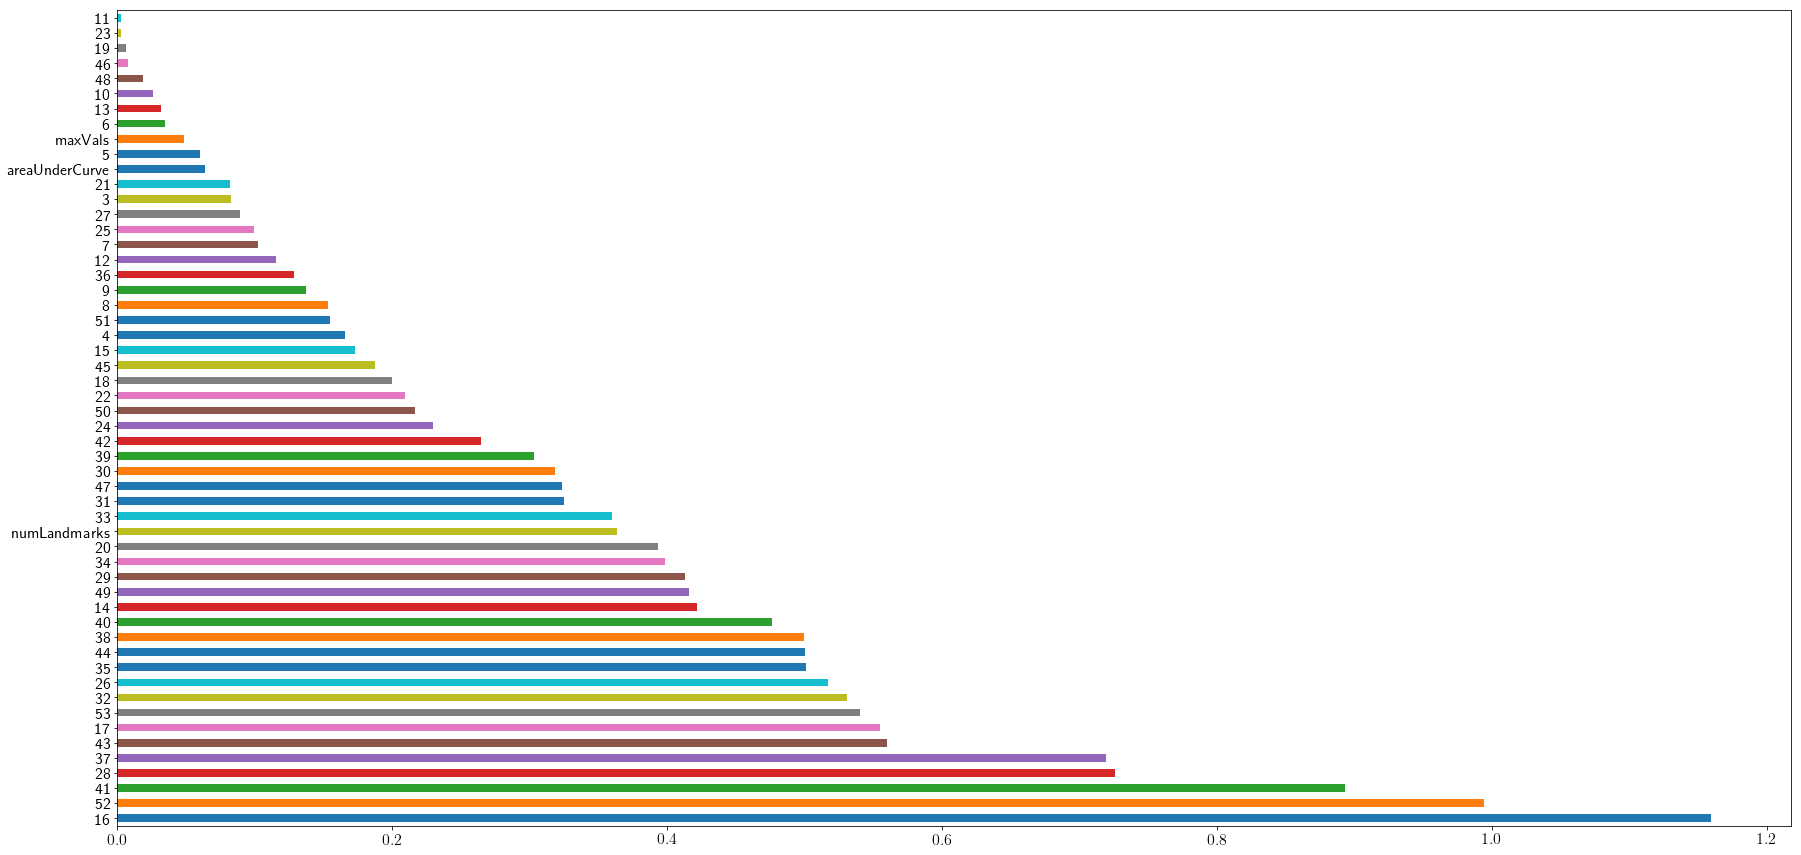

In [113]:
features_names = list(df_features)#['1', '2','3','4','5','6','7','8','9']
plt.figure(figsize=(30,15))
clf_tmp = SVC(kernel="linear",class_weight='balanced', C=float(1),random_state=0)
clf_tmp.fit(X_train, y_train)
pd.Series(abs(clf.coef_[0]), index=features_names).nlargest(len(features_names)).plot(kind='barh')

In [ ]:
#Plot bars with colour based on their feature group (1 of the 3)?

In [245]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'average_precision'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print(scores)
print('Mean average precision score:',scores.mean())
print('Std dev average precision score:',scores.std())

[0.68212037 0.62120992 0.67057144 0.70326673 0.65663026]
Mean average precision score: 0.6667597435111344
Std dev average precision score: 0.02742491940242124


In [115]:
y_predictions = clf.predict(X_train)
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions))
print('Recall:',recall_score(y_train,y_predictions))
print('F1 score:',f1_score(y_train,y_predictions))
# This requires a probability or decision function
# print('Average precision:',average_precision_score(y_train,y_predictions))

Accuracy: 0.8285054575986566
Precision: 0.5565873476494486
Recall: 0.9476284584980237
F1 score: 0.7012797074954296


Area under PR curve: 0.6737385073659069
Average precision score: 0.6741146564529955


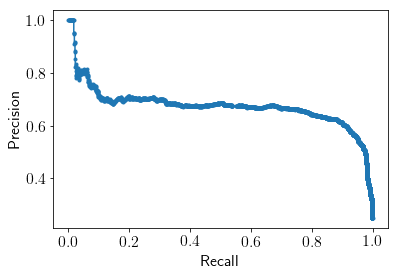

In [116]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
clf_probs = SVC(kernel="linear",class_weight='balanced', C=float(0.1),gamma=0.001,random_state=0,probability=True)
clf_probs.fit(X_train,y_train)
probs = clf_probs.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, probs)
print('Area under PR curve:',auc(recall,precision))
print('Average precision score:',average_precision_score(y_train, probs))
# plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [117]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

(0, 500)

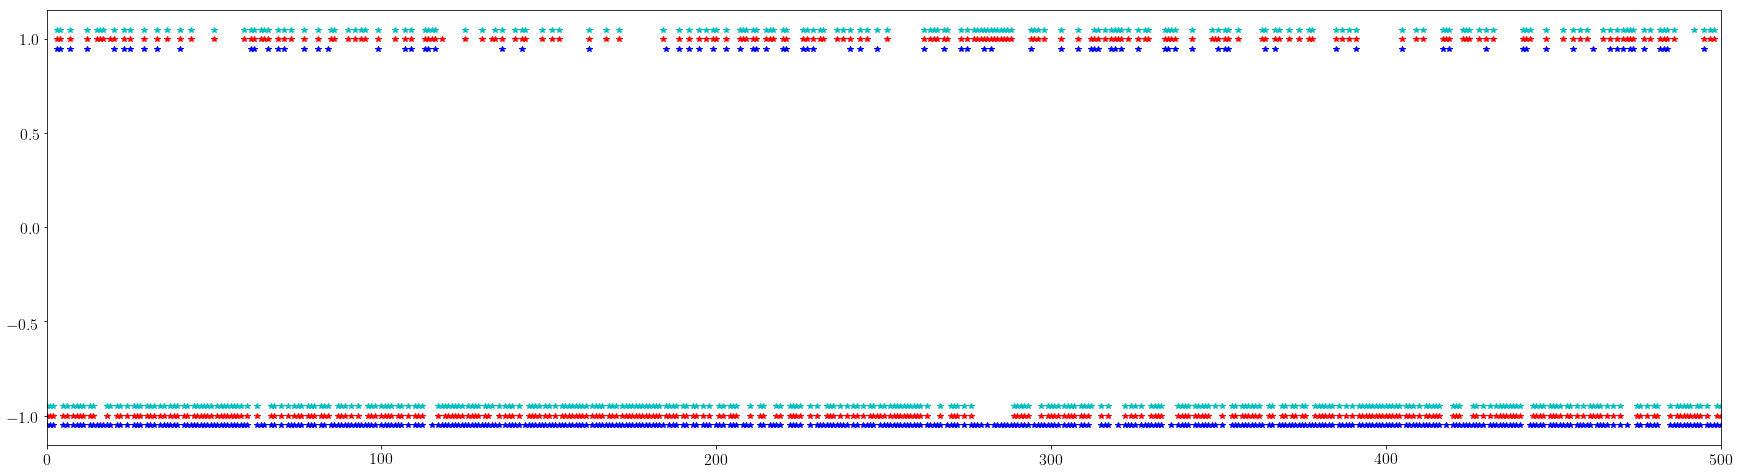

In [118]:
plt.figure(figsize=(30,8))
plt.plot(y_predictions,'r*')
plt.plot(y_train-0.05,'b*')
plt.plot(y_train_pred+0.05,'c*')

plt.xlim(0,500)

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[2989,  763],
       [  66,  946]])

In [120]:
from sklearn.metrics import precision_score, recall_score
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred),'\n')
print('F1 score: \n',f1_score(y_train,y_train_pred))

Precision (% when positive prediction is correct):
 0.553540081919251 

Recall (% of bad RO instances detected):
 0.9347826086956522 

F1 score: 
 0.6953325983094449


In [121]:
from sklearn.model_selection import cross_val_score
# y_scores = cross_val_predict(clf, X_train, y_train, cv=5,
#                                  method="decision_function")
# y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
y_scores = clf_probs.predict_proba(X_train)
y_scores = y_scores[:, 1]

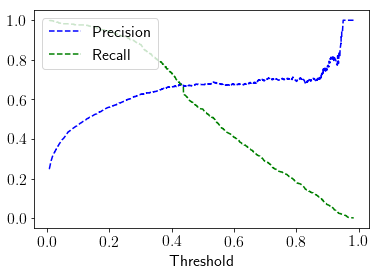

*** If we set a threshold here: ***
Precision (% when positive prediction is correct):
 0.5929712460063897 

Recall (% of bad RO instances detected):
 0.9169960474308301 



In [122]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
#     plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Need to set all bad RO labels from -1 to 0 for this function to work
tmp_y_train = np.array(y_train)
indices = [i for i, x in enumerate(tmp_y_train) if x == -1]
tmp_y_train[indices] = 0

y_train_pred_thresholding = (y_scores > 0.25)
print('*** If we set a threshold here: ***')
print('Precision (% when positive prediction is correct):\n',
      precision_score(tmp_y_train,y_train_pred_thresholding),'\n')
print('Recall (% of bad RO instances detected):\n',
      recall_score(tmp_y_train, y_train_pred_thresholding),'\n')

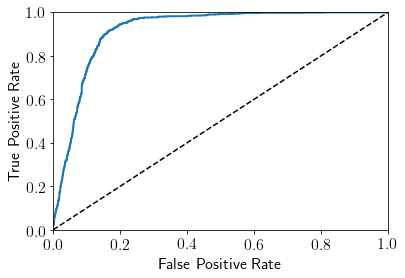

Area under ROC curve 0.9187250330785374


In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

print('Area under ROC curve',roc_auc_score(y_train, y_scores))

In [124]:
import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
sys.path.append("/Users/roberto/code/corelibs/src/tools-python")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes/datatypes_python")
import module

from mrg.logging import IndexedMonolithic #MonolithicDecoder
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python")
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python/protobuf/")

# for p in sys.path:
#     print(p)

from protobuf.classification_score import pbClassificationScore_pb2
classification_file = "/Users/roberto/data/odometry-comparisons/"\
"rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/ground-truth/labels.monolithic"

mono_decoder = IndexedMonolithic(classification_file) #MonolithicDecoder(classification_file)
classification_scores = []
classification_timestamps = []

for pb, _, _ in mono_decoder:
    timestamp = pb.timestamp
    classification_score = pb.score
    classification_scores.append(classification_score)
    classification_timestamps.append(timestamp)
print("Finished importing ground truth labels.")
print("Size of imported labels is:",len(classification_scores))

# classification_scores, timestamps  = map(list, zip(*[pb.score, pb.timestamp for pb, _, _ in mono_decoder]))
# classification_timestamps = [pb.timestamp for pb, _, _ in mono_decoder]

importing  protobuf.logging.pbMonolithicIndexArray_pb2
importing  protobuf.classification_score.pbClassificationScore_pb2
Finished importing ground truth labels.
Size of imported labels is: 5955


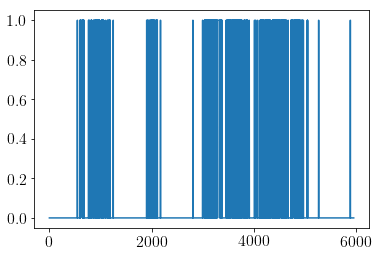

In [125]:
import matplotlib.pyplot as plt
plt.plot(classification_scores)
plt.show()

In [126]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0

Ground truth failures:  1265
Predicted failures:  2167
True positives:  1197
False positives:  970
True negatives:  3720
False negatives:  68
True positives:  1197
Confusion matrix:
 3720   970 
 68   3720
Precision: 0.5523765574526995
Recall: 0.9462450592885375
F1 score: 0.6975524475524475


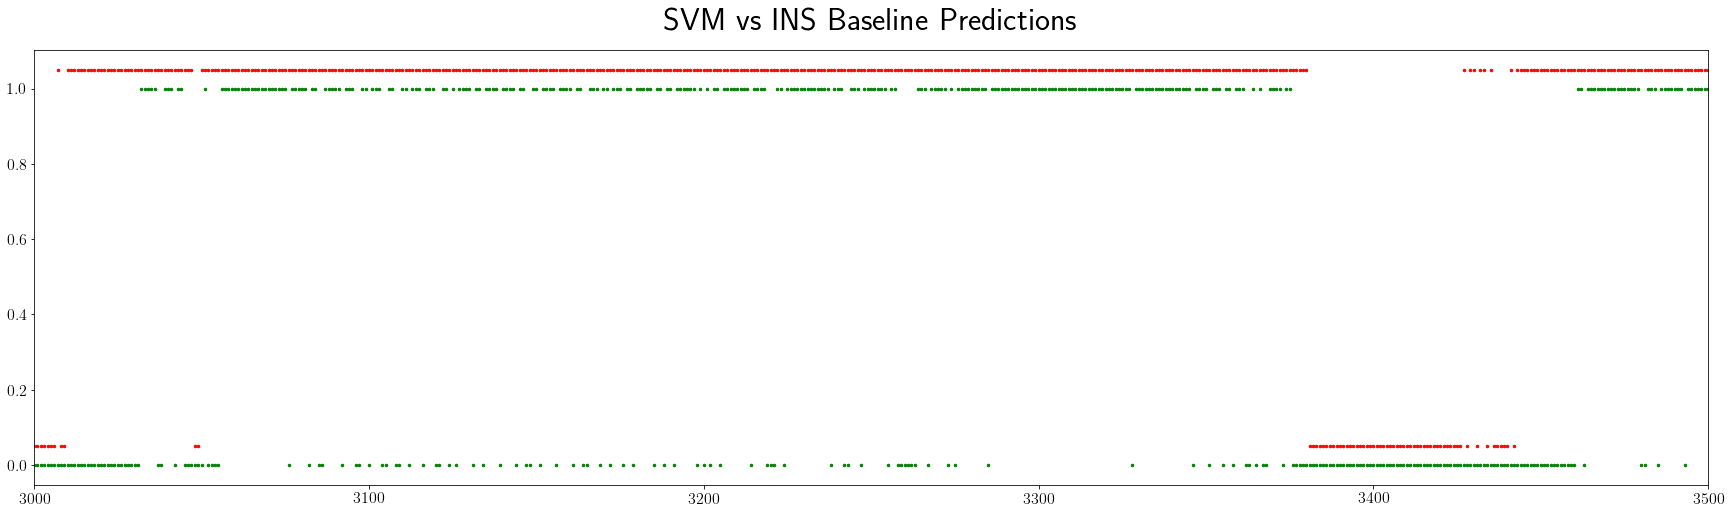

In [127]:
plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,3500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)


TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(classification_scores[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(classification_scores))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))

In [128]:
# from matplotlib import pyplot as plt
# from sklearn import svm
# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['input1', 'input2']
# svm = svm.SVC(kernel='linear')
# svm.fit(X_train, y_train)
# plt.plot(abs(svm.coef_).T,'*--')
# f_importances(svm.coef_, features_names)

Ground truth failures:  1378
Predicted failures:  2167
True positives:  1318
False positives:  849
True negatives:  3728
False negatives:  60
True positives:  1318
Confusion matrix:
 3728   849 
 60   3728
Precision: 0.6082141209044762
Recall: 0.9564586357039188
F1 score: 0.7435825105782794


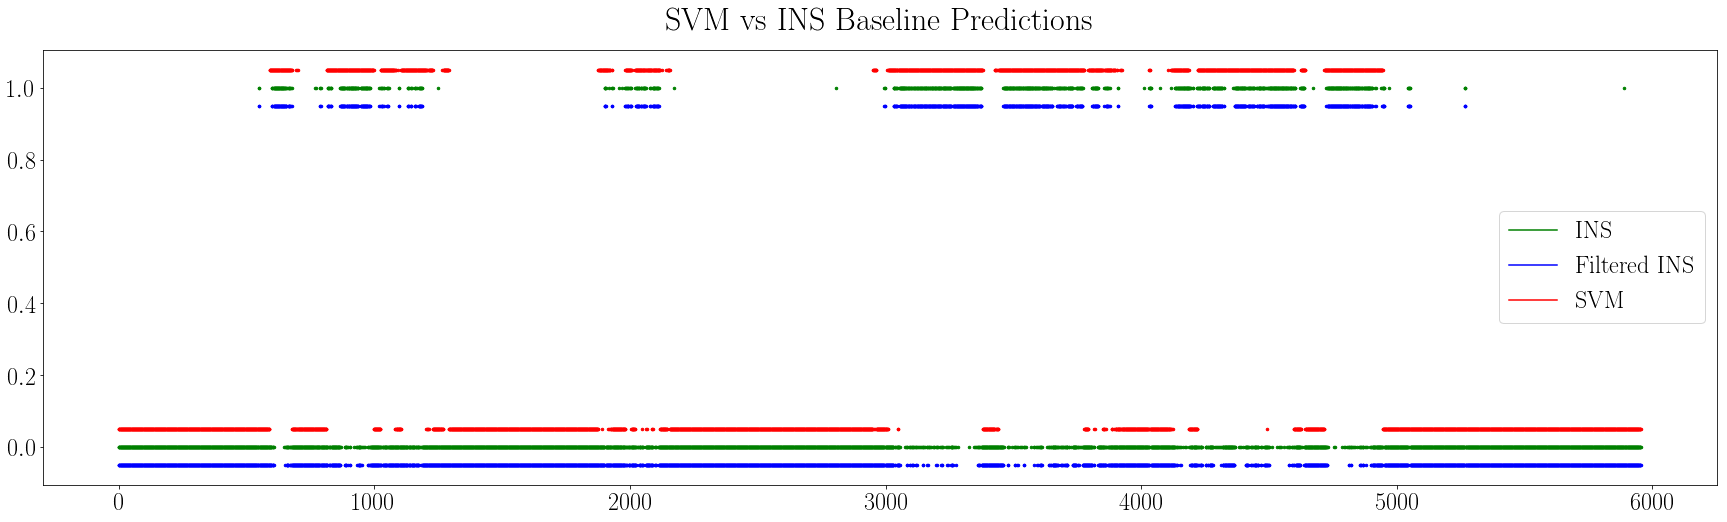

In [242]:
import scipy.signal
tmp_gt = np.array(classification_scores)
tmp_gt = scipy.signal.medfilt(tmp_gt,3)

plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x-0.05 for x in tmp_gt],'b.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
# plt.xlim(1000,4500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)
line1, = plt.plot([],[],color='green',label='INS')
line2, = plt.plot([],[],color='blue',label='Filtered INS')
line3, = plt.plot([],[],color='red',label='SVM')
plt.legend(handles=[line1,line2,line3],fontsize=24,loc='right')
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(tmp_gt[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(tmp_gt))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))

In [243]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0
y_train_pred_thresholding = (predictions > -0.5)

Area under PR curve: 0.7339610806965948
Average precision score: 0.7342407876134396


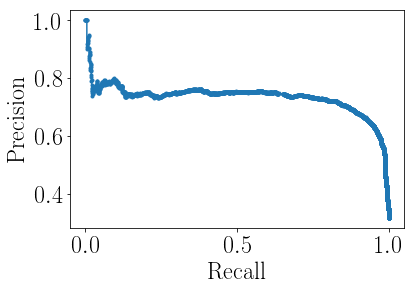

In [244]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
clf_probs = SVC(kernel="linear",class_weight='balanced', C=float(1),gamma=0.001,random_state=0,probability=True)
clf_probs.fit(X_experiment,tmp_gt)
probs = clf_probs.predict_proba(X_experiment)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(tmp_gt, probs)
print('Area under PR curve:',auc(recall,precision))
print('Average precision score:',average_precision_score(tmp_gt, probs))
# plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

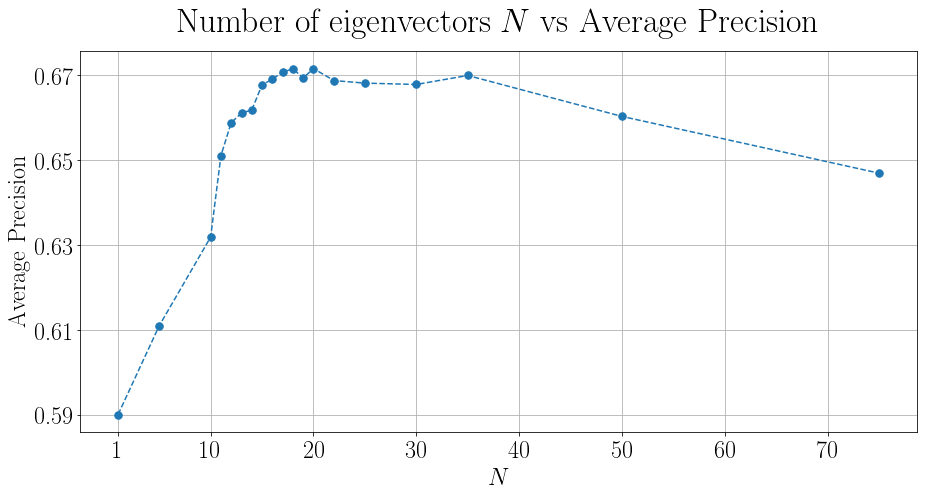

In [31]:
# Plot for N vs AP
N = [1,5,10,11,12,13,14,15,16,17,18,19,20,22,25,30,35,50,75]
AP = [0.5852394772,
0.6061773841,
0.6270936816,
0.6463153575,
0.6540687677,
0.6563589973,
0.6570551895,
0.6630090508,
0.6643194471,
0.6660077183,
0.6667597435,
0.6646211187,
0.6668325254,
0.6640034193,
0.6634010597,
0.6630819639,
0.6652076361,
0.6555497494,
0.6421637476]
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(15,7))  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
# ax.plot([1, 2, 3, 4])
# ax.set_ylabel('Average Precision)
# ax.set_
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# ax.size=8,4
ax.set_title('Number of eigenvectors $N$ vs Average Precision')
ax.set_xlabel('$N$')
ax.set_ylabel('Average Precision')
ax.set_yticks(np.arange(min(AP), max(AP), 0.02))
ax.set_xticks([1,10,20,30,40,50,60,70])
ax.plot(N,AP,'.--',markersize=15)

fig_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/"\
"2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/figs/"
plt.savefig(fig_path+"filename_varyingN.pdf",bbox_inches='tight',pad_inches = 0)